# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [40]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [42]:
# Passo 1: Remover o separador de milhares '.'
df['Income'] = df['Income'].str.replace('.', '', regex=False)

In [43]:
# Passo 2: Substituir o separador decimal ',' por '.'
df['Income'] = df['Income'].str.replace(',', '.', regex=False)

In [44]:
# Passo 3: Converter a coluna para o tipo float64
df['Income'] = df['Income'].astype(float)

In [45]:
print("\nAs 5 primeiras linhas com a coluna 'Income' corrigida:")
print(df.head())


As 5 primeiras linhas com a coluna 'Income' corrigida:
    Age  Gender    Income            Education Marital Status  \
0  25.0  Female   50000.0    Bachelor's Degree         Single   
1  30.0    Male  100000.0      Master's Degree        Married   
2  35.0  Female   75000.0            Doctorate        Married   
3  40.0    Male  125000.0  High School Diploma         Single   
4  45.0  Female  100000.0    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  


In [46]:
# Verificar a transformação
print("Após a conversão, os tipos de dados são:")
df.info()

Após a conversão, os tipos de dados são:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [47]:
df.isnull().sum()

,0
Age,34
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


In [48]:
# Calcula a media da coluna Age
mediana_idade = df['Age'].median()

In [49]:
# Filnna substitui os valores nulo pela mediana, e inplaca=True modifica o arquivo
df['Age'].fillna(mediana_idade, inplace=True)

/tmp/ipython-input-2235911408.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mediana_idade, inplace=True)


In [50]:
# Tratando o dado para int64 para retirar o ponto flutuand " . "
df['Age'] = df['Age'].astype('int64')

In [51]:
# Agora Age sem nenhum valor vaziu
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


In [52]:
# Age com o valor correto inte64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [53]:
# Selecionar somente colunas do tipo object
object_cols = df.select_dtypes(include="object")

# Exibir valores únicos de cada coluna categórica
for col in object_cols.columns:
    print(f"\nColuna: {col}")
    print(df[col].unique())
    print(df[col].value_counts())


Coluna: Gender
['Female' 'Male']
Gender
Female    86
Male      78
Name: count, dtype: int64

Coluna: Education
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

Coluna: Marital Status
['Single' 'Married']
Marital Status
Married    87
Single     77
Name: count, dtype: int64

Coluna: Home Ownership
['Rented' 'Owned']
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

Coluna: Credit Score
['High' 'Average' 'Low']
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [54]:
df.describe(include='all')

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
count,164.000000,164,164.000000,164,164,164.000000,164,164
unique,NaN,2,NaN,5,2,NaN,2,3
top,NaN,Female,NaN,Bachelor's Degree,Married,NaN,Owned,High
freq,NaN,86,NaN,42,87,NaN,111,113
mean,37.195122,NaN,83765.243902,NaN,NaN,0.652439,NaN,NaN
std,7.586619,NaN,32457.306728,NaN,NaN,0.883346,NaN,NaN
min,25.000000,NaN,25000.000000,NaN,NaN,0.000000,NaN,NaN
25%,31.750000,NaN,57500.000000,NaN,NaN,0.000000,NaN,NaN
50%,36.000000,NaN,83750.000000,NaN,NaN,0.000000,NaN,NaN
75%,43.000000,NaN,105000.000000,NaN,NaN,1.000000,NaN,NaN


### Com describe podemos ver algumas informações preciosas,


*   Idade: idade media da base possuir 37 anos, mas 75% tem 43 anos, e pessoa mais nova possui 25, a distribuição esta equilibrada entre 25 a 53,

*   Genero: Prodominado são as mulheres com 86 e 76 de homens, quase um equilibrio.

*   Salario anal em Dollar: temos um salario entre 25.000 e 162.500, media de 83.765 e mediana 83.750, são quase proximos, assim não precisamos nos preocupar com valores muitos dististos  ou outliers distorçendo o valor

*   Nivel escolar: Bachelor Degree a mais comum

*   Estado civil: Married 87 e Single 77, muito proporcional.

*   Numero de filhos: os dados vão de 0 a 3, média de 0.65 sendo a maria ter 0 ou 1 filho.

*   Moradia: Owned 111 sendo a maria possui uma residencia e Rented 53.

*   Credit Score: A mais frequente Higt contendo 113 e Medium e Low as restantes.

Com uma base neses dados principais, podemos tirar até um perfil nessa pre analise, se fosse um publico alvo o intuito da nossa analise

* Pessoa com 37, com renda anual de aproximadamente 84.000,00 dollar anuais, graduação em bacharelado, casado(a), proprietario de sua propria residenicia e com nivel alto de credit score



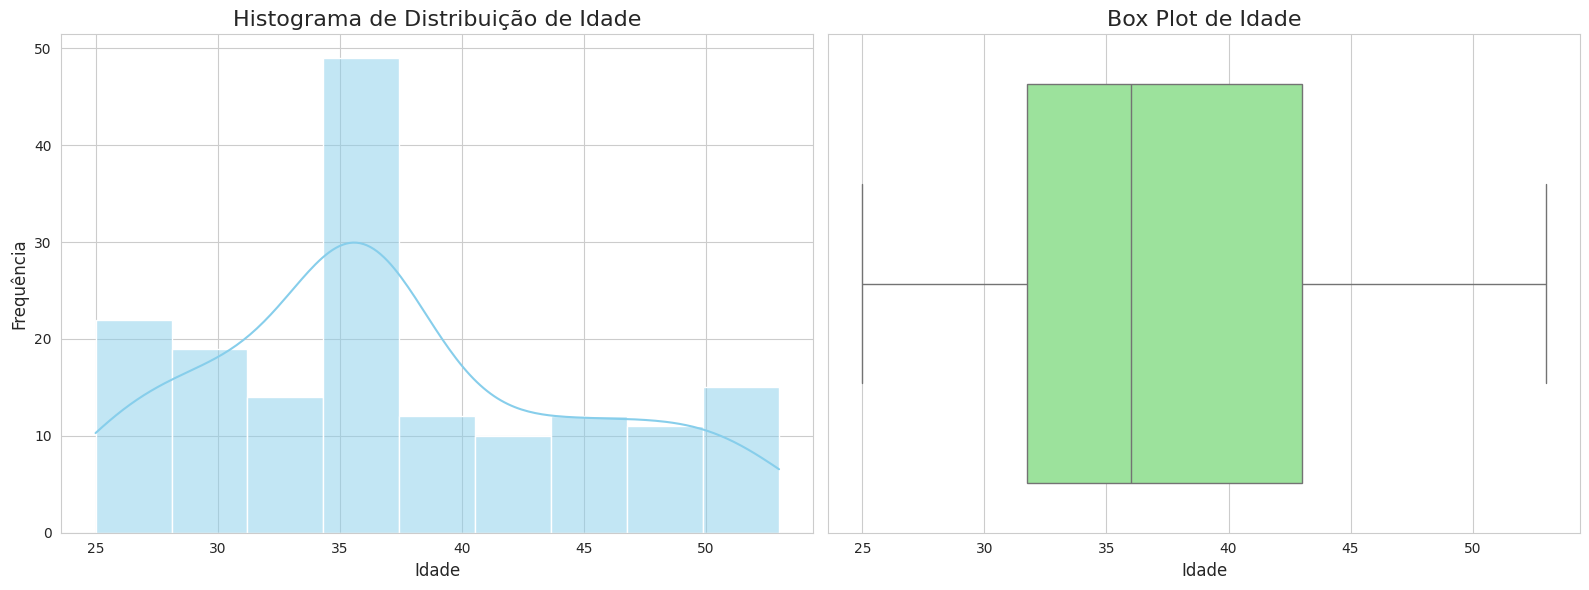

In [55]:
# --- Geração dos Gráficos para 'Age' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots (um ao lado do outro)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Histograma de Distribuição de Idade', fontsize=16)
axes[0].set_xlabel('Idade', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=df['Age'], ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot de Idade', fontsize=16)
axes[1].set_xlabel('Idade', fontsize=12)

plt.tight_layout()

Gerando o grafico de histograma podemos ver melhor nossa distruição pela idade, um maior numero concetrado entre 30 a 40 anos, com a curva de desnidade pode nos ajudar verifica uma distribuição em forma de sino, o que nos motra que não á um vies forte para idade velhas ou jovens,
Com auxilio do grafico de blox plot nos motra que não outliers nesses dados, e também nos confirma que a forte concetração da idade 50% delas esta no intervalo de 32 a 43 anos, e a linha do meio a mediana apresenta nos 36 anos.

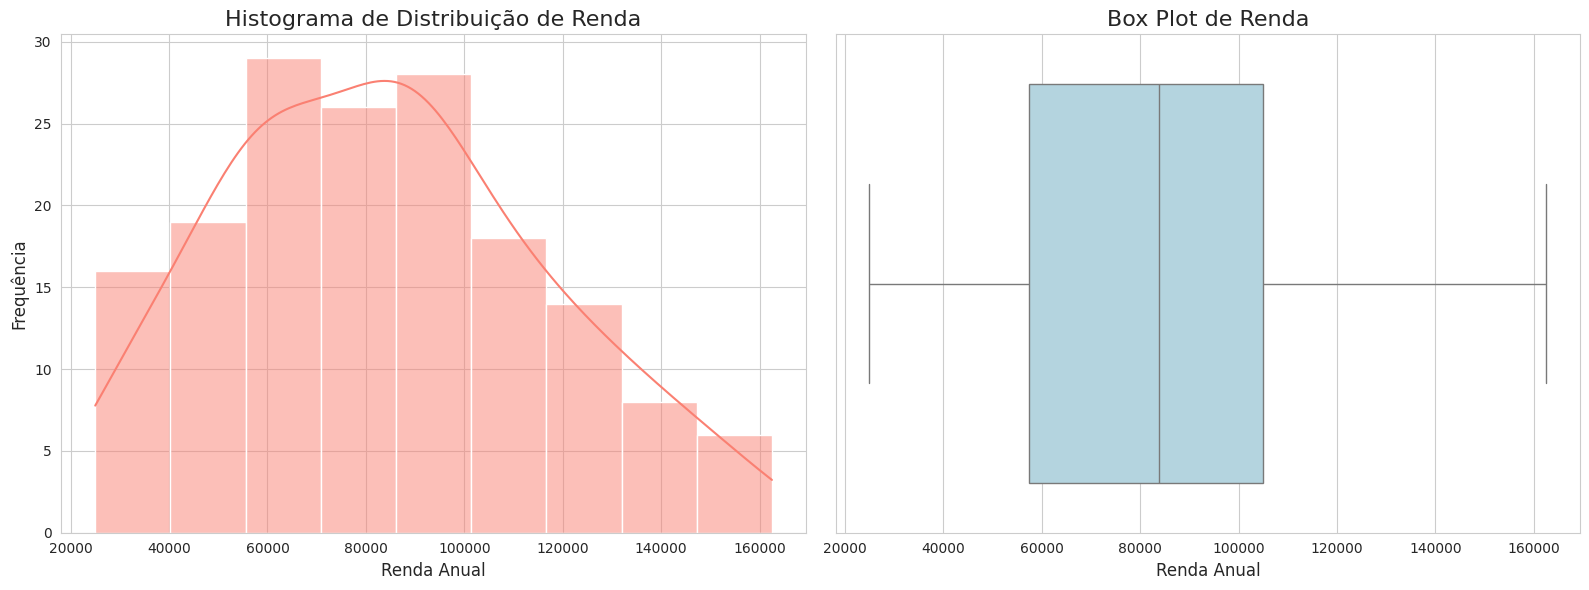

In [56]:
# --- Geração dos Gráficos para 'Income' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(df['Income'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Histograma de Distribuição de Renda', fontsize=16)
axes[0].set_xlabel('Renda Anual', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=df['Income'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot de Renda', fontsize=16)
axes[1].set_xlabel('Renda Anual', fontsize=12)

plt.tight_layout()
plt.show()

Como vimos no grafico da idade a curso do sino também apresenta nesse grafico, nos informando que a media e a mediana são quase iguais, nos mostrando uma grande concetração entre 60.000 a 100.000 e no grafico de bloxplot não é relevado outleirs fora da curva.

/tmp/ipython-input-889217481.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Number of Children', data=df, ax=axes[0], palette='pastel')


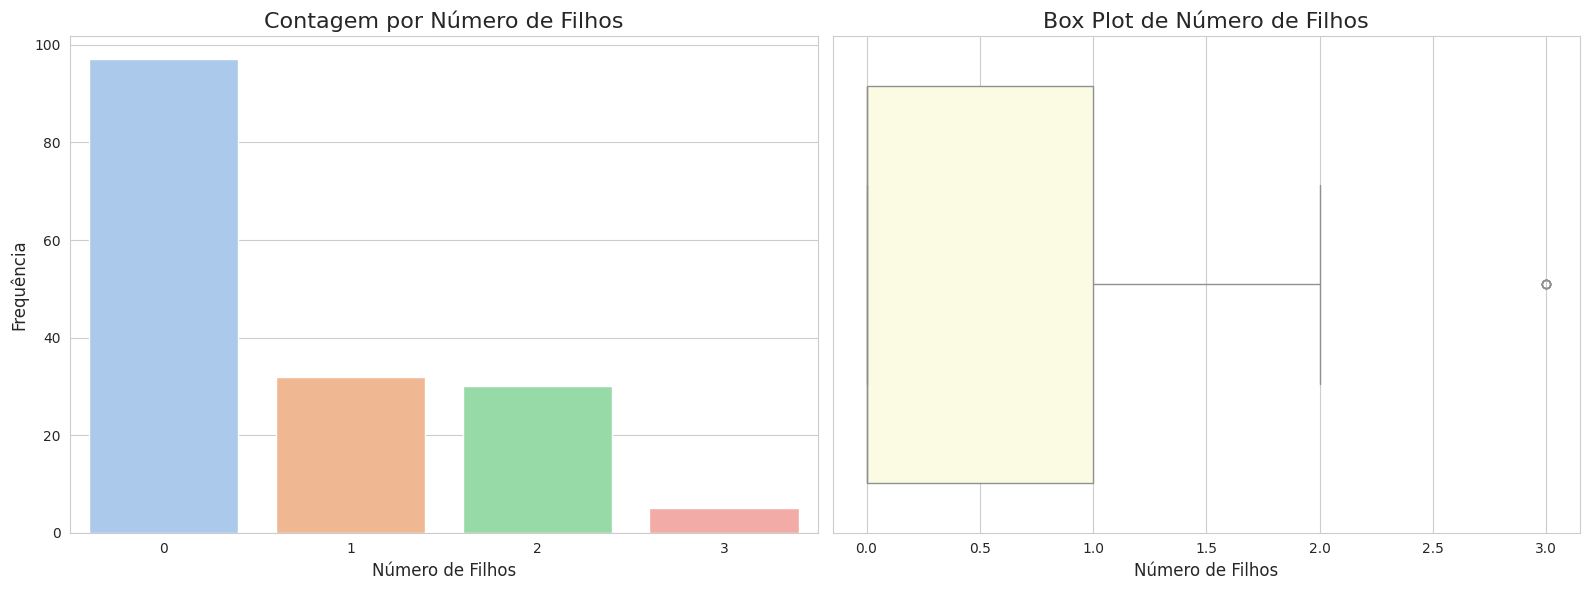

In [57]:
# --- Geração dos Gráficos para 'Number of Children' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma (usando countplot para variáveis discretas)
sns.countplot(x='Number of Children', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Contagem por Número de Filhos', fontsize=16)
axes[0].set_xlabel('Número de Filhos', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=df['Number of Children'], ax=axes[1], color='lightyellow')
axes[1].set_title('Box Plot de Número de Filhos', fontsize=16)
axes[1].set_xlabel('Número de Filhos', fontsize=12)

plt.tight_layout()

Comparado aos outros dados aqui não vemos um equilibrio, os dados do histograma nos mostra que que a maioria dos dados apresenta que possui 0 filhos e no blox plot a "caixa" esta para a esquerda pois os dados puxam para o valor 0, e a mediana esta no valor 1, e também podemos ver um outliers no valor 3, mas isso não significa que é errado e valor não esta fora como 10, 20 e 30 filhos, ele é um valor real.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

/tmp/ipython-input-2465952058.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index, palette='viridis')


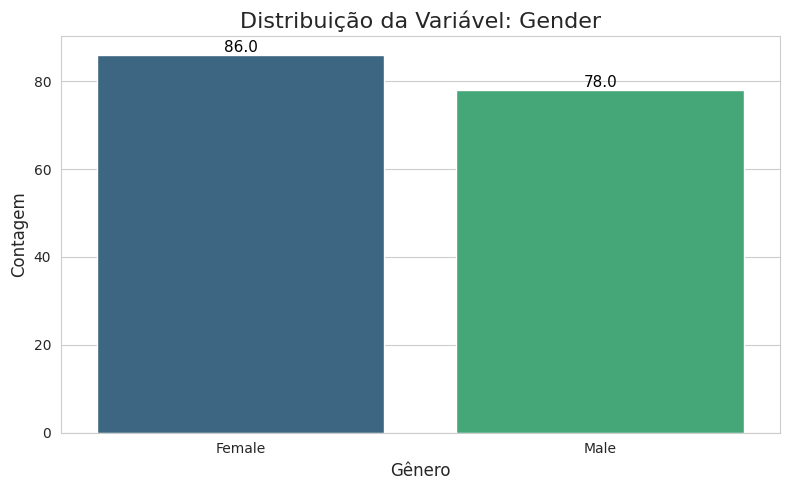

In [58]:
# --- Geração do Gráfico para 'Gender' ---

# Definir o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Criar o gráfico de contagem
ax = sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index, palette='viridis')

# Adicionar os rótulos de contagem em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição da Variável: Gender', fontsize=16)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Gênero', fontsize=12)
plt.tight_layout()


Nesse grafico verificar o Genero, Masculino 78 e Feminino 86, os valores estão equilibrado, assim não vai apresentar um vies na questão do genero.

/tmp/ipython-input-2514916552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index, palette='viridis')


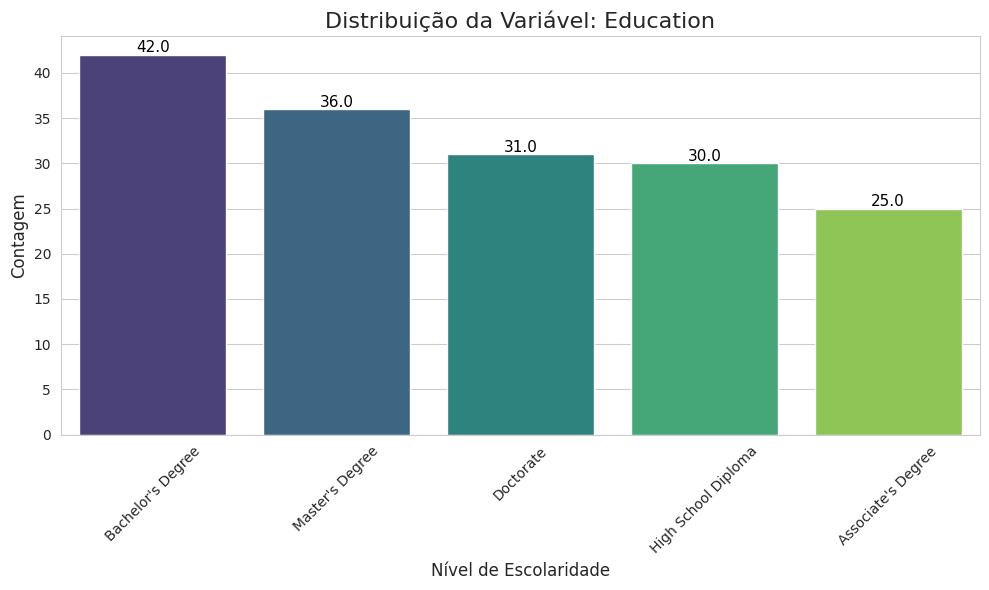

In [59]:
# --- Geração do Gráfico para 'Education' ---

# Definir o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Criar o gráfico de contagem
ax = sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index, palette='viridis')

# Adicionar os rótulos de contagem em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição da Variável: Education', fontsize=16)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Nível de Escolaridade', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Na categoria Education apresenta um equilibrio entre as categorias, o destaque vai para Bachelor’s Degree (42 ocorrências), as demais variasm entre 25 a 36 isso mostra que não existe um desbalaceamento muito alto, isso pode nos assegurar que não vies relevante nessa variavel.

/tmp/ipython-input-3974252793.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Marital Status', data=df, order=df['Marital Status'].value_counts().index, palette='viridis')


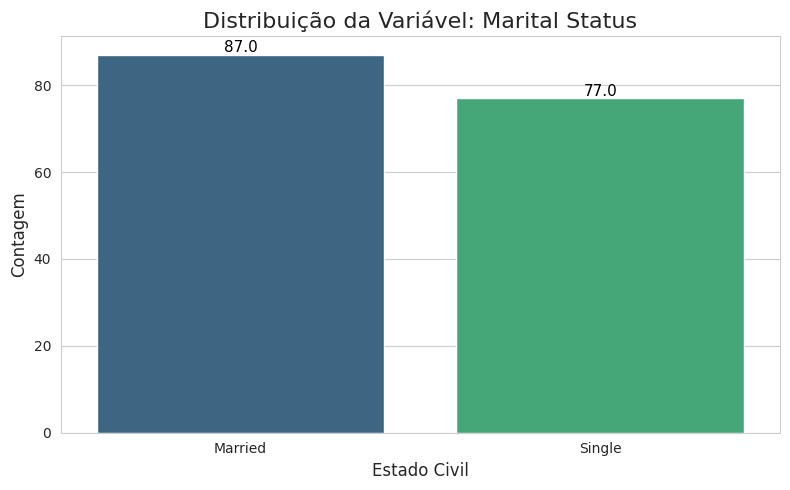

In [60]:
# --- Geração do Gráfico para 'Marital Status' ---

# Definir o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Criar o gráfico de contagem
ax = sns.countplot(x='Marital Status', data=df, order=df['Marital Status'].value_counts().index, palette='viridis')

# Adicionar os rótulos de contagem em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição da Variável: Marital Status', fontsize=16)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Estado Civil', fontsize=12)
plt.tight_layout()

A variável Marital Status apresenta uma distribuição equilibrada entre Married (87) e Single (77). Embora Married seja ligeiramente mais frequente, a diferença não é significativa a ponto de causar viés na análise

/tmp/ipython-input-3129521027.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Home Ownership', data=df, order=df['Home Ownership'].value_counts().index, palette='viridis')


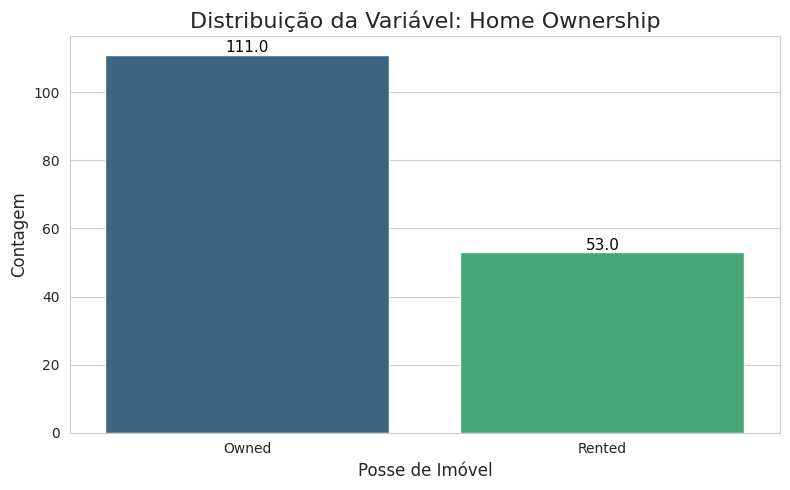

In [61]:
# --- Geração do Gráfico para 'Home Ownership' ---

# Definir o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Criar o gráfico de contagem
ax = sns.countplot(x='Home Ownership', data=df, order=df['Home Ownership'].value_counts().index, palette='viridis')

# Adicionar os rótulos de contagem em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição da Variável: Home Ownership', fontsize=16)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Posse de Imóvel', fontsize=12)
plt.tight_layout()

A variável Home Ownership apresenta certo desbalanceamento: 68% dos indivíduos possuem imóvel próprio, enquanto 32% vivem em imóvel alugado. Esse desbalanceamento pode levar a modelos de machine learning a priorizarem padrões da classe ‘Owned’, sendo importante considerar técnicas de balanceamento em análises preditivas

/tmp/ipython-input-2125145701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Credit Score', data=df, order=df['Credit Score'].value_counts().index, palette='viridis')


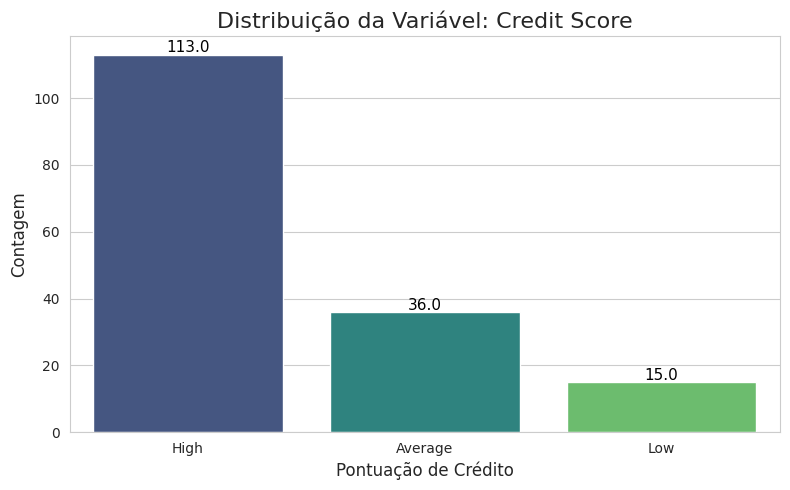

In [62]:
# --- Geração do Gráfico para 'Credit Score' ---

# Definir o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Criar o gráfico de contagem
ax = sns.countplot(x='Credit Score', data=df, order=df['Credit Score'].value_counts().index, palette='viridis')

# Adicionar os rótulos de contagem em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição da Variável: Credit Score', fontsize=16)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Pontuação de Crédito', fontsize=12)
plt.tight_layout()


A variável Credit Score apresenta um forte desbalanceamento: 69% dos indivíduos possuem pontuação High, enquanto apenas 22% e 9% estão nas categorias Average e Low, respectivamente. Esse desequilíbrio pode gerar viés em análises preditivas, favorecendo a classe majoritária (High) e prejudicando a capacidade do modelo de identificar corretamente indivíduos com score baixo

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Foi identificado um valor sobre a coluna de filhos, mas com o porte pequeno de valores que temos e por se tratar de um valor real, não podemos retirar ou tratar pois iria trazer um vies para os dados que temos e afetar os outros dados que temos e que estão corretos


**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



/tmp/ipython-input-2442094536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital Status', y='Age', data=df, palette='pastel')


Text(0, 0.5, 'Idade')

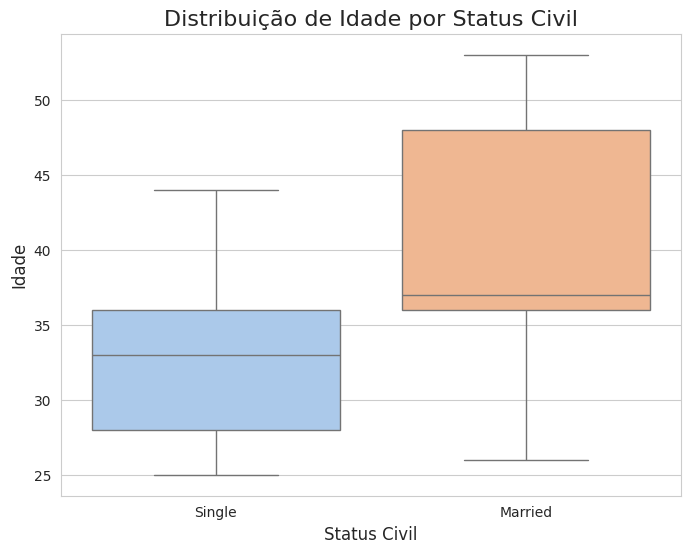

In [63]:
# --- Gráfico: Idade vs. Status Civil ---
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x='Marital Status', y='Age', data=df, palette='pastel')

plt.title('Distribuição de Idade por Status Civil', fontsize=16)
plt.xlabel('Status Civil', fontsize=12)
plt.ylabel('Idade', fontsize=12)

Utilizando o grafico de bloxplot podemos ver que ser mais velho tem relação com estar casado, e ser mais novo e totalmente relacionado por ser solteiro.
Assim podemos afirmar que pessoas casadas serão mais proximas de 40 anos e solteiras esta mais proximas de 30 anos

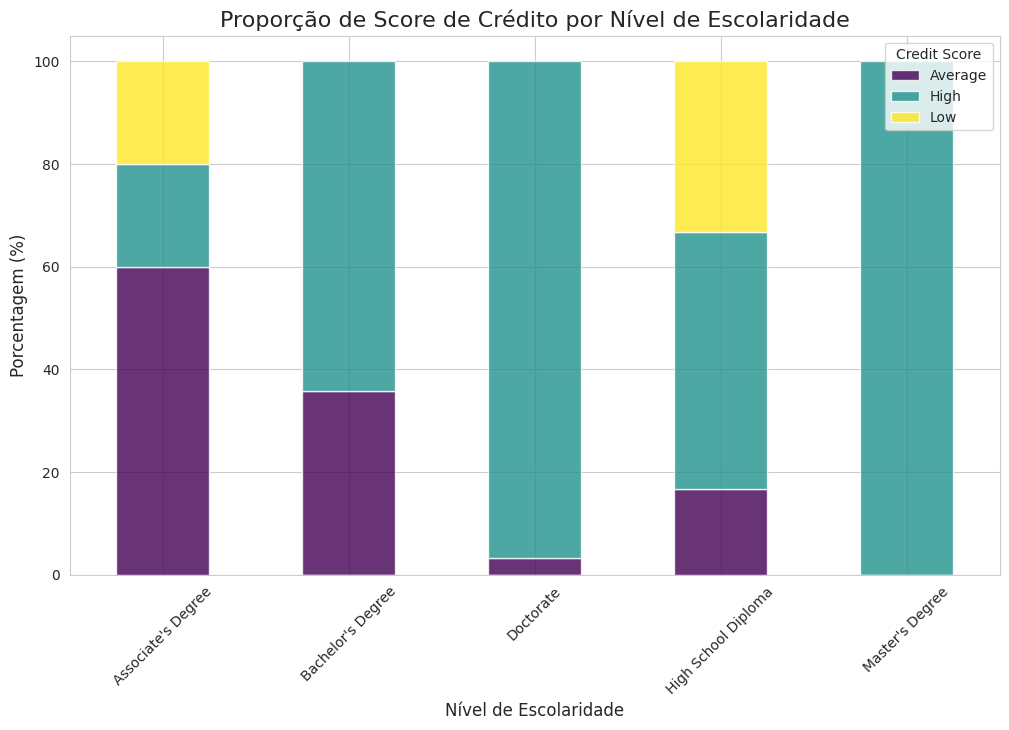

In [64]:
# --- Gráfico: Score de Crédito vs. Nível de Escolaridade ---

# Criar uma tabela de contingência e normalizá-la para obter as proporções
cross_tab = pd.crosstab(df['Education'], df['Credit Score'], normalize='index') * 100

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7),
               colormap='viridis', alpha=0.8)

plt.title('Proporção de Score de Crédito por Nível de Escolaridade', fontsize=16)
plt.xlabel('Nível de Escolaridade', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Credit Score')

Aqui podemos verificar que o Score HIGH apresenta em todas os tipo de nivel de escolaridade, em destaque Doutorado e Mestrado, e podemos verificar quando maior o nivel de escolaridade melhor o nivel de Credit Score, e podemos ver uma distribuição mais equilibrada em Associados com a presença dos 3 nivel de Credit Score

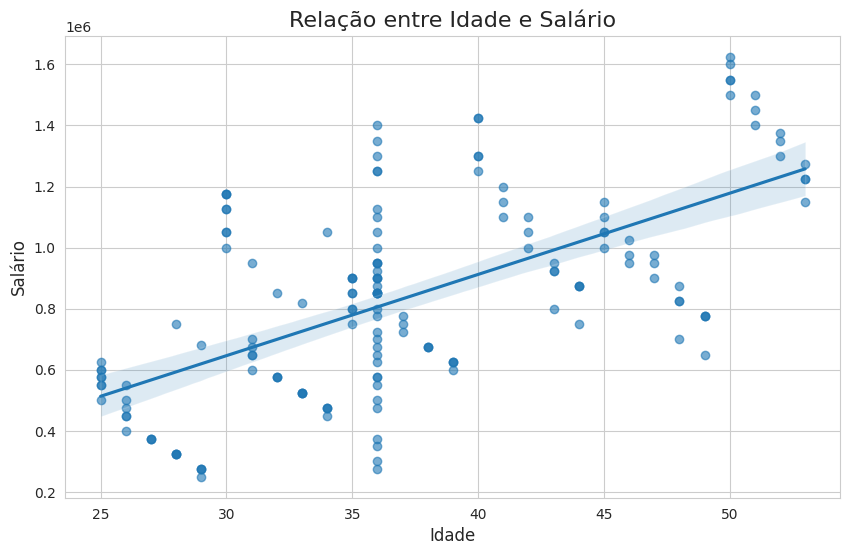

In [65]:
# --- Gráfico: Salário vs. Idade ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Clean and convert the 'Income' column to numeric
df['Income'] = df['Income'].astype(str).str.replace('.', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '.', regex=False)
df['Income'] = pd.to_numeric(df['Income'])

# Usar regplot para criar um scatter plot com uma linha de regressão
sns.regplot(x='Age', y='Income', data=df, scatter_kws={'alpha':0.6})

plt.title('Relação entre Idade e Salário', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Salário', fontsize=12)
plt.show() # Added plt.show() to ensure the plot is displayed

Utilizando o grafico Scatter Plot (gráfico de dispersão), podemos ver a relação do salarios os pontos azuis e a linha da idade sendo proporcional, assim quando maior a idade mais salario tende a aumentar

/tmp/ipython-input-1456664665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit Score', y='Income', data=df, palette='magma',


Text(0, 0.5, 'Salário')

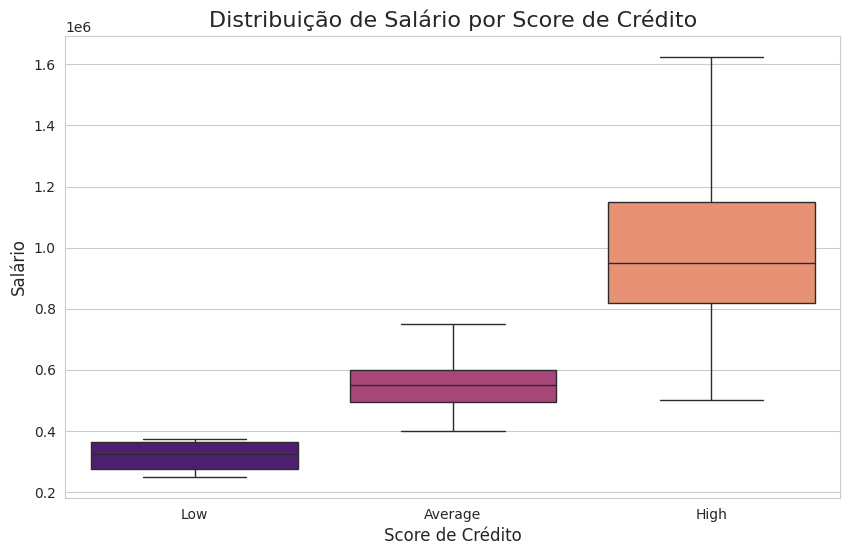

In [66]:
# --- Gráfico: Salário vs. Score de Crédito ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(x='Credit Score', y='Income', data=df, palette='magma',
            order=['Low', 'Average', 'High']) # Ordenar as categorias

plt.title('Distribuição de Salário por Score de Crédito', fontsize=16)
plt.xlabel('Score de Crédito', fontsize=12)
plt.ylabel('Salário', fontsize=12)

Podemos claramente o a evolução do Cred SCORE com o aumento de salario, e sendo assim o grupo HIGH sendo a faixa salarial maior comparado o AVARAGE e LOW.

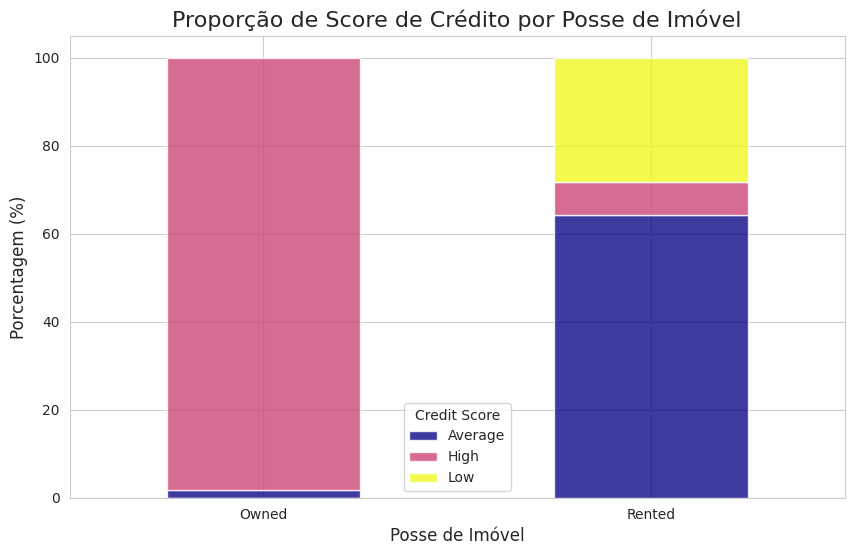

In [67]:
# --- Gráfico: Score de Crédito vs. Posse de Imóvel ---

# Criar uma tabela de contingência e normalizá-la
cross_tab = pd.crosstab(df['Home Ownership'], df['Credit Score'], normalize='index') * 100

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6),
               colormap='plasma', alpha=0.8)

plt.title('Proporção de Score de Crédito por Posse de Imóvel', fontsize=16)
plt.xlabel('Posse de Imóvel', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Credit Score')

Utilizando o grafico de barras podemos ver quem possuiu residencia propria tentem de o Cred Score maior, e quem possui residencia de aluguel tende a ter um baixo Cred Score.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

 * Existe uma diferença salarial significativa entre homens e mulheres?
 * O número de filhos parece ter alguma relação com a renda?
 * Qual o impacto do nível de escolaridade na faixa salarial?


/tmp/ipython-input-504559710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Income', data=df, palette='plasma')


Text(0, 0.5, 'Salário')

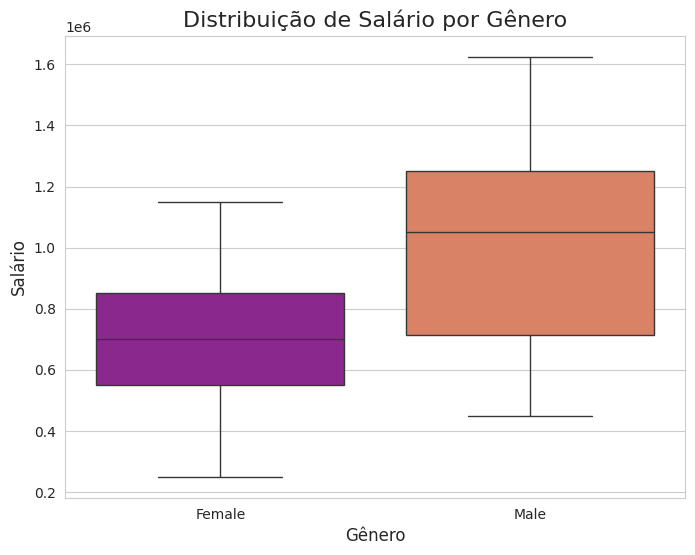

In [68]:
# --- Gráfico: Salário vs. Gênero ---
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x='Gender', y='Income', data=df, palette='plasma')

plt.title('Distribuição de Salário por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Salário', fontsize=12)

Podemos afimar que nesses dados os homens tem a maior faixa salarial, e com uma media maior do que as mulheres.

/tmp/ipython-input-3792763567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number of Children', y='Income', data=df, palette='coolwarm')


Text(0, 0.5, 'Salário')

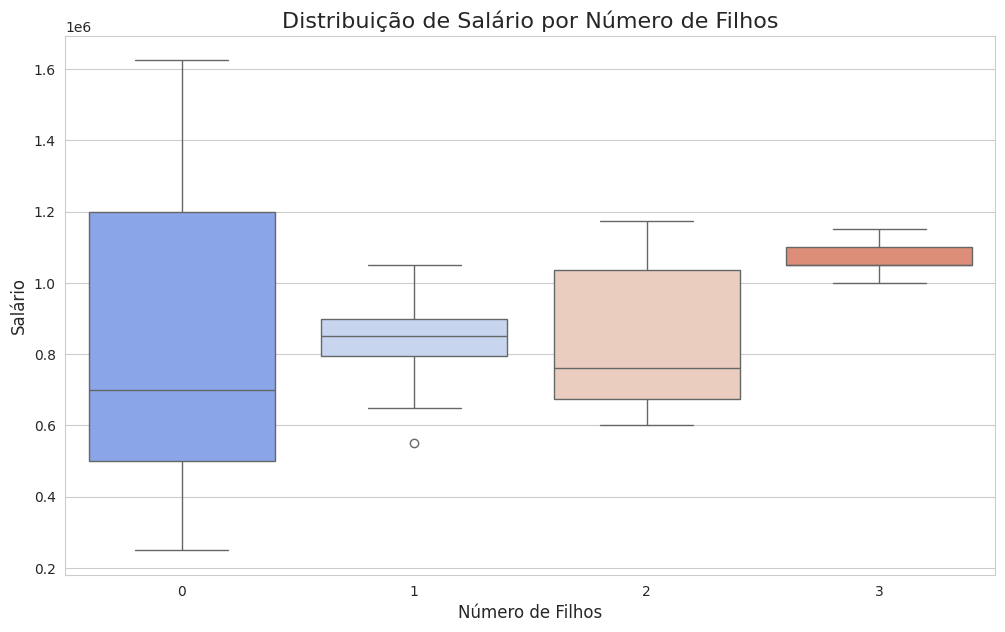

In [69]:
# --- Gráfico: Salário vs. Número de Filhos ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

sns.boxplot(x='Number of Children', y='Income', data=df, palette='coolwarm')

plt.title('Distribuição de Salário por Número de Filhos', fontsize=16)
plt.xlabel('Número de Filhos', fontsize=12)
plt.ylabel('Salário', fontsize=12)

Nese grafico não vemos um progressão a relação de filhos com o salario, mas podemos afirmar que a estabilidade financiero se apresenta em quem optou por não ter filhos, e pessoas que não possuem filhoes em sua maioria são solteiro  ate pessoas mais velhas casadas que optaram por não tem filhos.

/tmp/ipython-input-888317901.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='Income', data=df, palette='rocket', order=ordem_escolaridade)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'High School Diploma'),
  Text(1, 0, "Associate's Degree"),
  Text(2, 0, "Bachelor's Degree"),
  Text(3, 0, "Master's Degree"),
  Text(4, 0, 'Doctorate')])

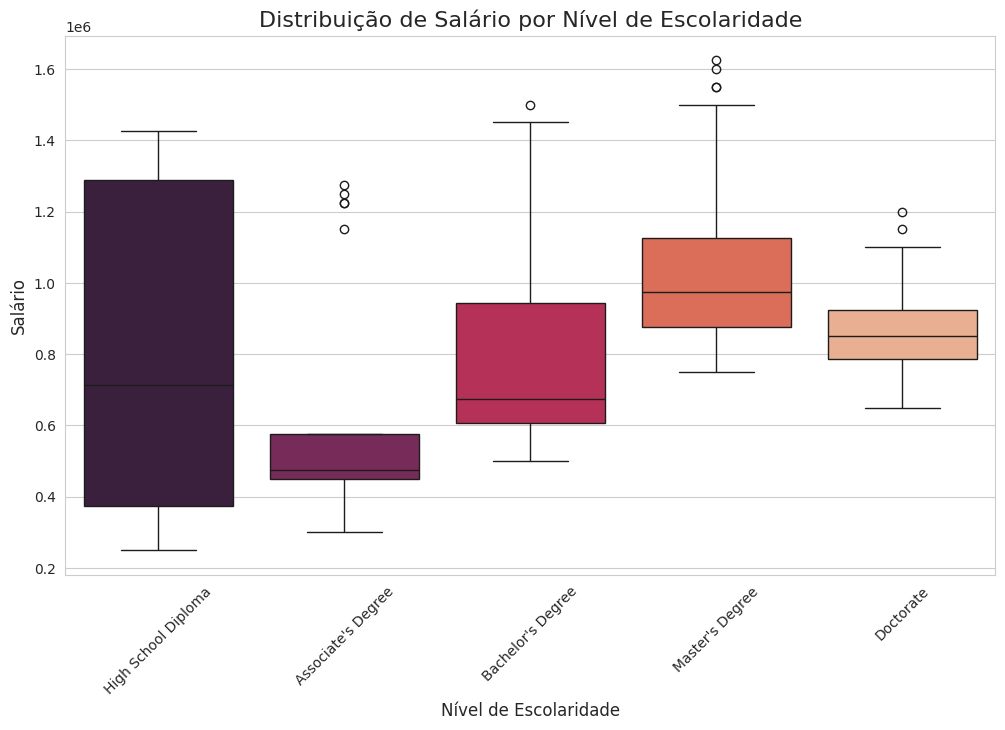

In [70]:
# --- Gráfico: Salário vs. Nível de Escolaridade ---

# Criar uma ordem lógica para os níveis de escolaridade
ordem_escolaridade = [
    'High School Diploma',
    "Associate's Degree",
    "Bachelor's Degree",
    "Master's Degree",
    'Doctorate'
]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

sns.boxplot(x='Education', y='Income', data=df, palette='rocket', order=ordem_escolaridade)

plt.title('Distribuição de Salário por Nível de Escolaridade', fontsize=16)
plt.xlabel('Nível de Escolaridade', fontsize=12)
plt.ylabel('Salário', fontsize=12)
plt.xticks(rotation=45)

Aqui podemos ver uma relaçao positiva quanto mais escolaridade maior o salario, mas não linear dependendo o nivel de escolaridade, podemos ver que o nivel de escolaridade basico propoem um nivel de salario alto mas com a mediana abaixo, e o doutorado por sem um nivel maior não proporcional o maior salario.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

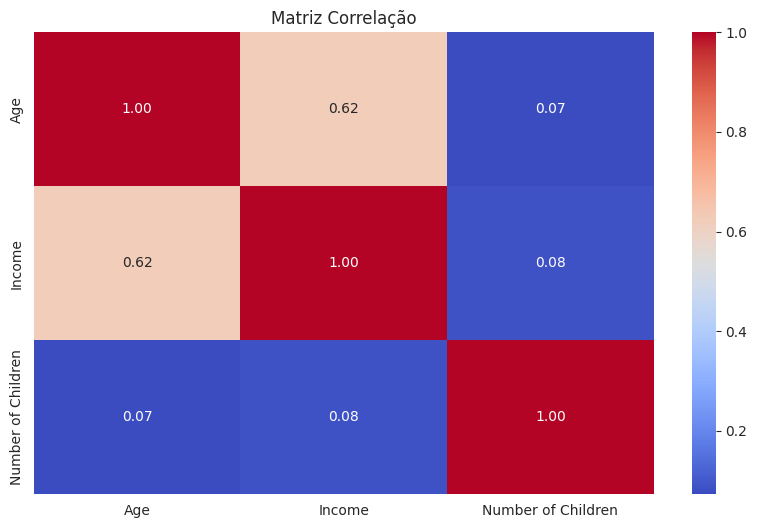

In [71]:
# --- Matriz de Correlação das Variáveis Numéricas ---
correlation_matrix = df.select_dtypes(include='number').corr()

# Criando um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           annot_kws={'size': 10})
plt.title('Matriz Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

podemos verificar que alta com as variaveis idade e income, que também foi confirmado nas verificaçoes anteriores, assim quando mais velho apresenta uma progressão na carreira e valor do salario progride junto.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [72]:
 # --- Início do Tratamento das Variáveis Categóricas ---

# Criação do objeto LabelEncoder para transformar variáveis categóricas em valores numéricos
label_encoder = LabelEncoder()

# Codificação da variável 'Gender'
# Transformamos os valores categóricos (ex.: 'Male', 'Female') em números inteiros (0, 1)
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df = df.drop(['Gender'], axis=1)  # Removemos a coluna original após a transformação

# Codificação da variável 'Marital Status'
# Exemplo: 'Single', 'Married', 'Divorced' → 0, 1, 2
df['Marital_Status_encoded'] = label_encoder.fit_transform(df['Marital Status'])
df = df.drop(['Marital Status'], axis=1)

# Codificação da variável 'Home Ownership'
# Exemplo: 'Owned', 'Rented', 'Mortgage' → 0, 1, 2
df['Home_Ownership_encoded'] = label_encoder.fit_transform(df['Home Ownership'])
df = df.drop(['Home Ownership'], axis=1)

# One-Hot Encoding para a variável 'Education'
# Cria colunas binárias para cada categoria de 'Education',
# exceto a primeira (drop_first=True) para evitar multicolinearidade
df = pd.get_dummies(df,
                    columns=['Education'],
                    prefix='Education',
                    drop_first=True)


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

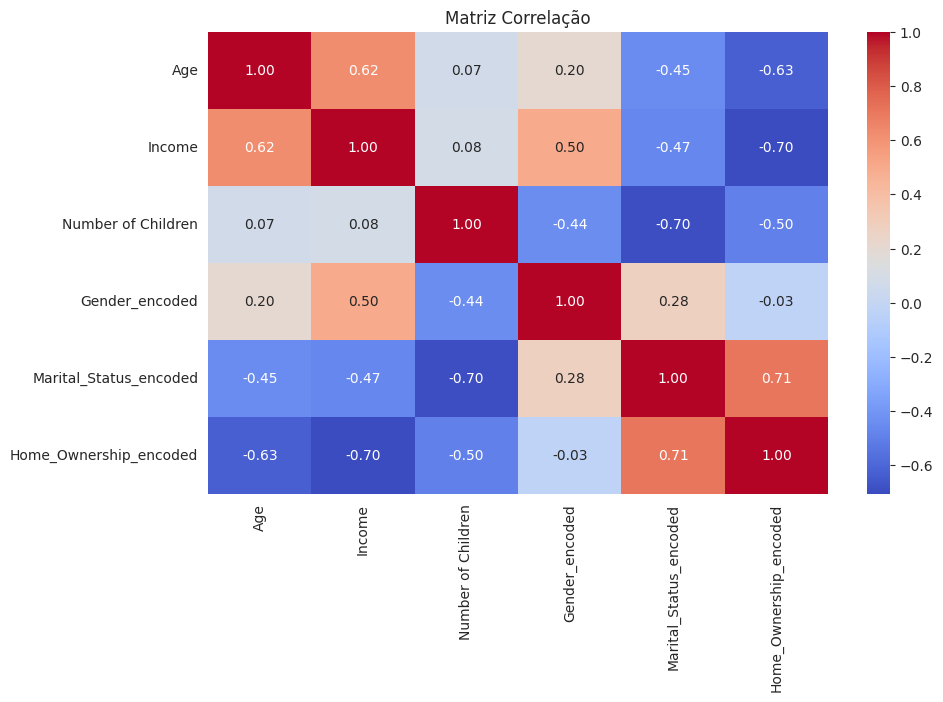

In [73]:
# --- Matriz de Correlação das Variáveis Numéricas ---
correlation_matrix = df.select_dtypes(include='number').corr()

# Criando um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           annot_kws={'size': 10})
plt.title('Matriz Correlação')
plt.show()

Podemos verificar que foi de uma matriz 3x3 para 6x6 e podemos ver mais variariais alem de age com icome, como Number of children com Matial status, home ownership com Marital status, home ownership com income.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [74]:
# --- Separação das Variáveis: Features (X) e Alvo (y) ---

# Definindo a variável alvo (o que queremos prever)
y = df['Credit Score']

# Definindo as features (todas as colunas que serão usadas como preditoras)
X = df.drop(columns=['Credit Score'])

# ---  Divisão dos Dados em Treino e Teste ---

# train_test_split divide os dados em conjuntos de treino e teste
# - test_size=0.2 → 20% para teste e 80% para treino
# - random_state=42 → garante reprodutibilidade (mesmo resultado em execuções diferentes)
# - stratify=y → mantém a mesma proporção de classes do alvo em ambos os conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ---  Verificação da Separação dos Dados ---

print("\n--- Verificação da Separação ---")
print(f"Total de features (X): {X.shape}")
print(f"Total do alvo (y): {y.shape}")
print("-" * 40)
print(f"Features de Treino (X_train): {X_train.shape}")
print(f"Alvo de Treino (y_train): {y_train.shape}")
print("-" * 40)
print(f"Features de Teste (X_test): {X_test.shape}")
print(f"Alvo de Teste (y_test): {y_test.shape}")


--- Verificação da Separação ---
Total de features (X): (164, 10)
Total do alvo (y): (164,)
----------------------------------------
Features de Treino (X_train): (131, 10)
Alvo de Treino (y_train): (131,)
----------------------------------------
Features de Teste (X_test): (33, 10)
Alvo de Teste (y_test): (33,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

/tmp/ipython-input-1102884917.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train, palette='viridis', order=['High', 'Average', 'Low'])


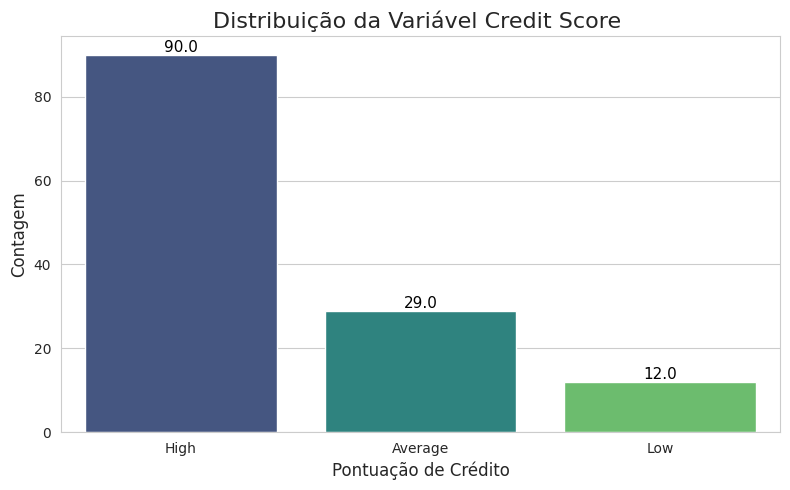

In [79]:
# --- Verificação do Balanceamento Credit Score ---

# Definir o estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Criar o gráfico de contagem para a variável alvo nos dados de TREINO
ax = sns.countplot(x=y_train, palette='viridis', order=['High', 'Average', 'Low'])

# Adicionar os rótulos de contagem em cima de cada barra para facilitar a leitura
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição da Variável Credit Score ', fontsize=16)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Pontuação de Crédito', fontsize=12)
plt.tight_layout()
plt.show()

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

--- Contagem das Classes ANTES do Balanceamento ---
Credit Score
High       90
Average    29
Low        12
Name: count, dtype: int64
\n--------------------------------------------------\n
--- Contagem das Classes DEPOIS do Balanceamento ---
Credit Score
High       90
Low        90
Average    90
Name: count, dtype: int64


/tmp/ipython-input-3787770751.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train_balanced, palette='viridis', order=['High', 'Average', 'Low'])


Text(0.5, 0, 'Pontuação de Crédito')

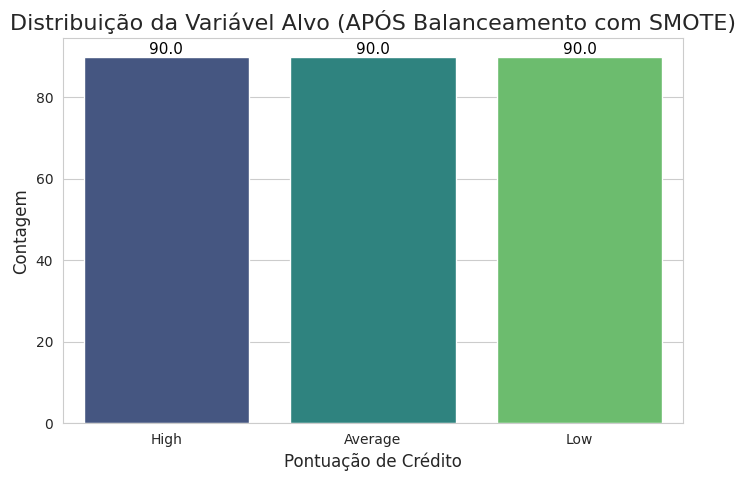

In [82]:
# ---  Balanceamento dos Dados de Treino com SMOTE ---

# Criação do objeto SMOTE
# O random_state garante que o resultado seja o mesmo sempre que executarmos o código
smote = SMOTE(random_state=42)

# Aplicação do SMOTE apenas nos dados de TREINO
# O SMOTE irá criar novos dados para as classes minoritárias até que todas tenham a mesma contagem
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# --- Verificação do Balanceamento Após o SMOTE ---

print("--- Contagem das Classes ANTES do Balanceamento ---")
print(y_train.value_counts())
print("\\n" + "-"*50 + "\\n")
print("--- Contagem das Classes DEPOIS do Balanceamento ---")
print(y_train_balanced.value_counts())

# Criar um novo gráfico para visualizar o resultado
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y_train_balanced, palette='viridis', order=['High', 'Average', 'Low'])

# Adicionar os rótulos de contagem
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribuição da Variável Alvo (APÓS Balanceamento com SMOTE)', fontsize=16)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Pontuação de Crédito', fontsize=12)